# Task 4

## Imports

In [153]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
import seaborn as sns
#sns.set(style="whitegrid")
import matplotlib.pyplot as plt
import pandas as pd

## Load dataset
Dataset from previous exercise is used

In [154]:
df = pd.read_csv('JO_pivoted.csv')
print(df.columns)
df

Index(['Unnamed: 0', 'region', 'year', 'barley', 'energy forest',
       'fallow land',
       'field peas for cooking, fodder peas, vetches and field beans',
       'green fodder', 'green peas', 'horticulture plants',
       'ley for hay and forage plants', 'ley for seeds', 'mixed grain',
       'mixed grain and triticale', 'not utilized ley for hay and pasture',
       'oats', 'oil flax', 'other crops', 'other untilled arable land',
       'potatoes for processing of starch', 'rye', 'spring barley',
       'spring rape', 'spring turnip rape', 'spring wheat', 'sugar beets',
       'table potatoes', 'total arable land', 'triticale',
       'unspecified arable land', 'utilized ley for hay',
       'utilized ley for hay and pasture', 'utilized pasture', 'white beans',
       'winter barley', 'winter rape', 'winter turnip rape', 'winter wheat'],
      dtype='object')


,Unnamed: 0,region,year,barley,energy forest,fallow land,"field peas for cooking, fodder peas, vetches and field beans",green fodder,green peas,horticulture plants,...,triticale,unspecified arable land,utilized ley for hay,utilized ley for hay and pasture,utilized pasture,white beans,winter barley,winter rape,winter turnip rape,winter wheat
0,0,0114 Upplands Väsby,1981,500.0,0.0,179.0,0.0,43.0,0.0,0.0,...,0.0,0.0,0.0,229.0,0.0,0.0,0.0,0.0,0.0,80.0
1,1,0114 Upplands Väsby,1985,586.0,0.0,30.0,11.0,63.0,0.0,0.0,...,0.0,0.0,0.0,201.0,0.0,0.0,0.0,0.0,0.0,40.0
2,2,0114 Upplands Väsby,1989,264.0,0.0,124.0,22.0,0.0,0.0,0.0,...,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,14.0,477.0
3,3,0114 Upplands Väsby,1990,213.0,0.0,57.0,38.0,2.0,0.0,0.0,...,0.0,0.0,0.0,213.0,0.0,0.0,0.0,0.0,2.0,520.0
4,4,0114 Upplands Väsby,1991,328.0,0.0,91.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,217.0,0.0,0.0,0.0,0.0,6.0,180.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4055,4055,2584 Kiruna,1999,0.0,0.0,17.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,272.0,0.0,0.0,0.0,0.0,0.0,0.0
4056,4056,2584 Kiruna,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,109.0,0.0,151.0,0.0,0.0,0.0,0.0,0.0,0.0
4057,4057,2584 Kiruna,2002,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,90.0,0.0,140.0,0.0,0.0,0.0,0.0,0.0,0.0
4058,4058,2584 Kiruna,2003,0.0,0.0,15.0,0.0,0.0,0.0,0.0,...,0.0,69.0,0.0,143.0,0.0,0.0,0.0,0.0,0.0,0.0


## Regression
Lets look at linear and polynomial regression for the data, we will try to fit a line for "total arable land" per year, lets first split the data.

In [155]:
exclude_columns = ['Unnamed: 0', 'region', 'total arable land', 'barley']
target = 'barley'

X = df[[col for col in df.columns if col not in exclude_columns]]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Linear Regression
Lets train the linear regression method for it

In [156]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

### Polynomial regression
Lets train the polynomial regression model for the same task

In [157]:
degree = 2
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

### Predictions and visualizing the results

Mean Squared Error: 546027.9521174212
R^2 Score: 0.8196851733152932


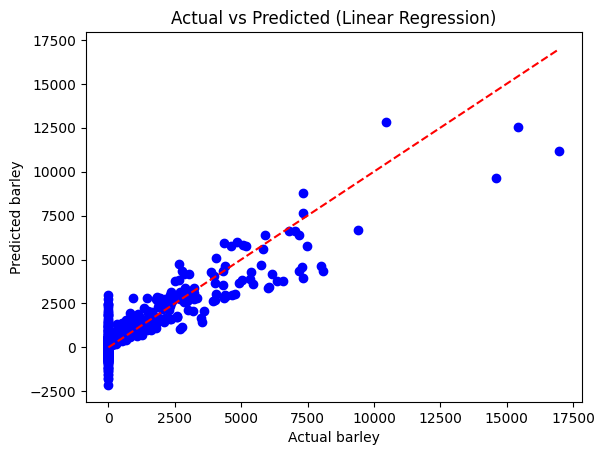

Polynomial Regression (degree = 2)
Mean Squared Error: 2442995.4346461706
R^2 Score: 0.19324954577595554


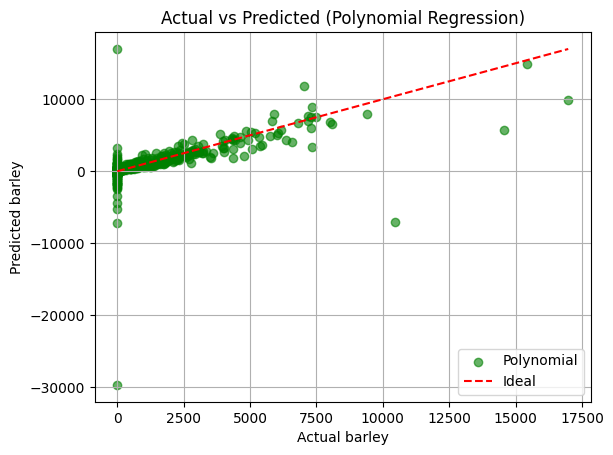

In [158]:
linear_y_pred = linear_model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, linear_y_pred))
print("R^2 Score:", r2_score(y_test, linear_y_pred))

plt.scatter(y_test, linear_y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.xlabel('Actual barley')
plt.ylabel('Predicted barley')
plt.title('Actual vs Predicted (Linear Regression)')
plt.show()

poly_y_pred = poly_model.predict(X_test)
print("Polynomial Regression (degree = 2)")
print("Mean Squared Error:", mean_squared_error(y_test, poly_y_pred))
print("R^2 Score:", r2_score(y_test, poly_y_pred))

plt.scatter(y_test, poly_y_pred, color='green', alpha=0.6, label='Polynomial')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.xlabel('Actual barley')
plt.ylabel('Predicted barley')
plt.title('Actual vs Predicted (Polynomial Regression)')
plt.legend()
plt.grid(True)
plt.show()


## Clustering
Lets do clustering with k-Means and GMM, first lets prepare the data and select the features to cluster on. It would be interesting to see how much fallow land it is in relation to how much barley is grown. From the previous assignment, barley was produced in a pretty large amount.

In [159]:
cluster_features = ['barley', 'fallow land',]
cluster_df = df[cluster_features]

### k-Means
Lets cluster and visualize the results

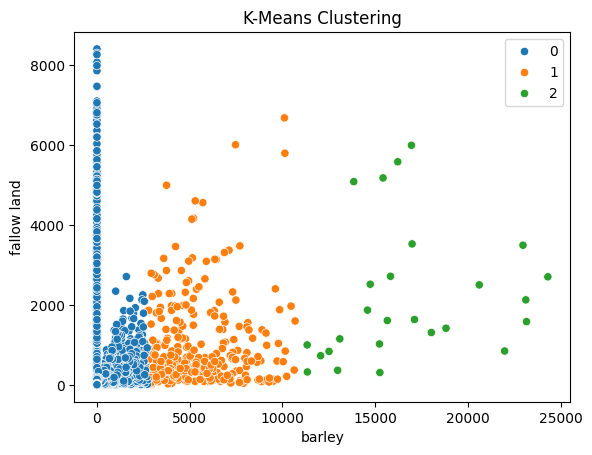

In [160]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
y_kmeans = kmeans.fit_predict(cluster_df)

sns.scatterplot(x=cluster_df[cluster_features[0]], y=cluster_df[cluster_features[1]], hue=y_kmeans, palette='tab10')
plt.title('K-Means Clustering')
plt.xlabel(cluster_features[0])
plt.ylabel(cluster_features[1])
plt.show()

### GMM
Lets run cluster and visualize the results

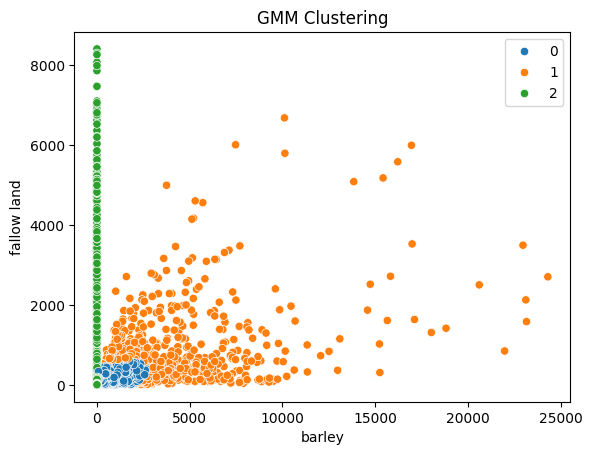

In [161]:
gmm = GMM(n_components=3, random_state=0)
y_gmm = gmm.fit_predict(cluster_df)

sns.scatterplot(x=cluster_df[cluster_features[0]], y=cluster_df[cluster_features[1]], hue=y_gmm, palette='tab10')
plt.title('GMM Clustering')
plt.xlabel(cluster_features[0])
plt.ylabel(cluster_features[1])
plt.show()
